#Importing libraries and dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [2]:
from google.colab import drive
drive.mount('/content/drive')
#loading the dataset to pandas dataframe
credit_card_data=pd.read_csv('/content/drive/MyDrive/ML LAB/creditcard.csv')

Mounted at /content/drive


In [3]:
#first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [7]:
from sklearn.preprocessing import StandardScaler

credit_card_data['normAmount'] = StandardScaler().fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))
data = credit_card_data.drop(['Time','Amount'],axis=1)
#class 1 data present in data set
data[data.Class==1]
data[data.Class==0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


#Checking the Target Class

In [8]:
#distribution of legit transaction and fraud transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

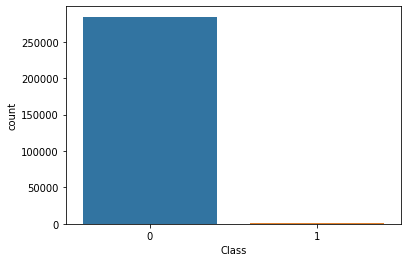

In [9]:
sns.countplot(x='Class', data=credit_card_data)

This dataset is highly unbalanced

0 --> Normal Transaction

1 --> Fraudulent transaction

This is a clear example where using a typical accuracy score to evaluate our classification algorithm. For example, if we just used a majority class to assign values to all records, we will still be having a high accuracy, BUT WE WOULD BE CLASSIFYING ALL "1" INCORRECTLY!!

#Resampling the dataset

Essentially this is a method that will process the data to have an approximate 50-50 ratio.

One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)



In [10]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
#print(y.sum())
# print(X)
#shows y dataset is of column class which has both 0 and 1
# y[y.Class==1]
# y[y.Class==0]



#Applying SMOTE with Over Sampling



As we mentioned earlier, there are several ways to resample skewed data. Apart from under and over sampling, there is a very popular approach called SMOTE (Synthetic Minority Over-Sampling Technique), which is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

In [11]:
from imblearn.over_sampling import SMOTE 
#Over sampling
sm = SMOTE(random_state=42, sampling_strategy='auto')

X_sampled,y_sampled = sm.fit_resample(X,y)

#Percentage of fraudlent records in original data
Source_data_no_fraud_count = len(data[data.Class==0])
Source_data_fraud_count = len(data[data.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

#Percentage of fraudlent records in sampled data
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))
# X_sampled.head(5)
# print(y_sampled)


Percentage of fraud counts in original dataset:0.1727485630620034%
Percentage of fraud counts in the new data:50.0%


#Split the data into trainning data and testing data

In [12]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 5)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# #both ytrain n ytest have 0 & 1 class
# print(y_train.shape)
# print(y_train[y_train.Class==1])
# print(y_train[y_train.Class==0])
# print(y_test.shape)
# print(y_test[y_test.Class==1])
# print(y_test[y_test.Class==0])

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [13]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sampled ,y_sampled ,test_size = 0.2  ,random_state = 5)


In [14]:

# oversampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_test_sample ,y_test_sample ,test_size = 0.3  ,random_state = 5)
print("")
print("Number transactions train dataset: ", len(X_train_sampled))
print("Number transactions test dataset: ", len(X_test_sampled))
print("Total number of transactions: ", len(X_train_sampled)+len(X_test_sampled))


# X_train_sampled_df = pd.DataFrame(X_train_sampled)
# y_train_sampled_df = pd.DataFrame(y_train_sampled)
# X_test_sampled_df = pd.DataFrame(X_test_sampled)
# y_test_sampled_df = pd.DataFrame(y_test_sampled)
# X_train_sampled_df.head(10)
# y_train_sampled_df.head(10)




Number transactions train dataset:  79608
Number transactions test dataset:  34118
Total number of transactions:  113726


Recall score is the metric that will help us try to capture the most fraudulent transactions. Accuracy, Precision and Recall work for a confusion matrix

Accuracy = (TP+TN)/total
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.



#Model Training

#Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score,precision_score,f1_score

#HYPERTUNING FUNCTION









In [16]:
def logistic_regression(x_train,x_test,y_train,y_test):
  c_param_range = [0.01,0.1,1,10,100]
  solver=["lbfgs", "liblinear", "sag", "saga"]
  penaltys={ "lbfgs":  ['l2'] , "liblinear":['l1', 'l2'] , "sag":['l2'], "saga": [ "l1", "l2"] }
  li=list()
  cval=None 
  sol=None 
  pen=None
  rec_max=0
  for solve in solver: 
    for penalty in penaltys[solve]:
      for c in c_param_range:
        lr = LogisticRegression(C = c, penalty = penalty ,solver=solve  )
        lr.fit(x_train,y_train)
        y_pred=lr.predict(x_test)
        recall=recall_score(y_test,y_pred)
        accuracy=accuracy_score(y_test,y_pred)
        precision=precision_score(y_test,y_pred)
        f1score=f1_score(y_test,y_pred)

        classification =(classification_report(y_test, y_pred))
        li.append([solve,penalty,c,recall,accuracy,precision,f1score])
        if recall>rec_max:
          cval=c
          sol=solve
          pen=penalty
          rec_max=recall

  
  print("Maximum Values Obtained at : ")
  print("Solver =",sol)
  print("Penalty =",pen)
  print("C =",cval)
  print("Recall =",rec_max)
  return li 








#Hypertuning on the original dataset





In [17]:
y_train=np.array(y_train).ravel()
y_test=np.array(y_test).ravel()

In [18]:
li=logistic_regression(X_train, X_test, y_train, y_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Maximum Values Obtained at : 
Solver = lbfgs
Penalty = l2
C = 1
Recall = 0.6081081081081081


In [19]:
df=pd.DataFrame(li,columns=["Solver","Penalty","C","Recall Score","Accuracy","Precision","F1-Score"])
print(df)


       Solver Penalty       C  Recall Score  Accuracy  Precision  F1-Score
0       lbfgs      l2    0.01      0.574324  0.999146   0.894737  0.699588
1       lbfgs      l2    0.10      0.601351  0.999181   0.890000  0.717742
2       lbfgs      l2    1.00      0.608108  0.999192   0.891089  0.722892
3       lbfgs      l2   10.00      0.601351  0.999181   0.890000  0.717742
4       lbfgs      l2  100.00      0.601351  0.999181   0.890000  0.717742
5   liblinear      l1    0.01      0.547297  0.999111   0.900000  0.680672
6   liblinear      l1    0.10      0.587838  0.999169   0.896907  0.710204
7   liblinear      l1    1.00      0.608108  0.999192   0.891089  0.722892
8   liblinear      l1   10.00      0.601351  0.999181   0.890000  0.717742
9   liblinear      l1  100.00      0.601351  0.999181   0.890000  0.717742
10  liblinear      l2    0.01      0.554054  0.999122   0.901099  0.686192
11  liblinear      l2    0.10      0.567568  0.999134   0.893617  0.694215
12  liblinear      l2    

#Hypertuning on the resampled dataset

In [20]:
y_train_sampled=np.array(y_train_sampled).ravel()
y_test_sampled=np.array(y_test_sampled).ravel()

In [21]:
li2=logistic_regression(X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Maximum Values Obtained at : 
Solver = lbfgs
Penalty = l2
C = 100
Recall = 0.9161949226728917


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [22]:
df=pd.DataFrame(li,columns=["Solver","Penalty","C","Recall Score","Accuracy","Precision","F1-Score"])
print(df)

       Solver Penalty       C  Recall Score  Accuracy  Precision  F1-Score
0       lbfgs      l2    0.01      0.574324  0.999146   0.894737  0.699588
1       lbfgs      l2    0.10      0.601351  0.999181   0.890000  0.717742
2       lbfgs      l2    1.00      0.608108  0.999192   0.891089  0.722892
3       lbfgs      l2   10.00      0.601351  0.999181   0.890000  0.717742
4       lbfgs      l2  100.00      0.601351  0.999181   0.890000  0.717742
5   liblinear      l1    0.01      0.547297  0.999111   0.900000  0.680672
6   liblinear      l1    0.10      0.587838  0.999169   0.896907  0.710204
7   liblinear      l1    1.00      0.608108  0.999192   0.891089  0.722892
8   liblinear      l1   10.00      0.601351  0.999181   0.890000  0.717742
9   liblinear      l1  100.00      0.601351  0.999181   0.890000  0.717742
10  liblinear      l2    0.01      0.554054  0.999122   0.901099  0.686192
11  liblinear      l2    0.10      0.567568  0.999134   0.893617  0.694215
12  liblinear      l2    

#RAMDOM FOREST



In [23]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train_sampled, y_train_sampled)
# predictions
yPred = rfc.predict(X_test_sampled)

In [24]:
prediction = rfc.predict(X_test_sampled)
print(confusion_matrix(y_test_sampled, prediction))
print(accuracy_score(y_test_sampled, prediction))
print(classification_report(y_test_sampled, prediction))

[[16969    14]
 [   20 17115]]
0.9990034585849112
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16983
           1       1.00      1.00      1.00     17135

    accuracy                           1.00     34118
   macro avg       1.00      1.00      1.00     34118
weighted avg       1.00      1.00      1.00     34118



#SUPPORT VECTOR MACHINES (SVM)

In [ ]:
from sklearn.svm import SVC
 # "Support vector classifier creation"  
classifier = SVC(kernel='sigmoid', random_state=0)  
classifier.fit(X_train_sampled, y_train_sampled)
# predictions
yPred_SVC = classifier.predict(X_test_sampled)


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
 
classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)

model = svm.SVC(kernel = 'sigmoid', random_state = 0, C=1.0)

model.fit(X_train_sampled, y_train_sampled)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
prediction = classifier.predict(X_test_sampled)
print(confusion_matrix(y_test_sampled, prediction))
print(accuracy_score(y_test_sampled, prediction))
print(classification_report(y_test_sampled, prediction))

[[14776  2207]
 [ 2369 14766]]
0.8658772495456943
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     16983
           1       0.87      0.86      0.87     17135

    accuracy                           0.87     34118
   macro avg       0.87      0.87      0.87     34118
weighted avg       0.87      0.87      0.87     34118



#Using GridsearchCV on SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_sampled, y_train_sampled)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=11.3min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=10.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=12.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.888 total time=11.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.895 total time=12.0min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time= 2.9min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time= 2.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time= 2.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.992 total time= 2.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time= 2.8min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.959 total time= 1.4min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
prediction = .predict(X_test_sampled)
print(confusion_matrix(y_test_sampled, prediction))
print(accuracy_score(y_test_sampled, prediction))
print(classification_report(y_test_sampled, prediction))